In [52]:
import pandas as pd
import nltk


In [53]:
books_data = pd.read_csv('./cleaned_data/cleaned_books.csv')
books_data

title  \
0                          Its Only Art If Its Well Hung!   
1                                Dr. Seuss: American Icon   
2                   Wonderful Worship in Smaller Churches   
3                           Whispers of the Wicked Saints   
4       Nation Dance: Religion, Identity and Cultural ...   
...                                                   ...   
212399  The Orphan Of Ellis Island (Time Travel Advent...   
212400                            Red Boots for Christmas   
212401                                              Mamaw   
212402                                  The Autograph Man   
212403  Student's Solutions Manual for Johnson/Mowry's...   

                                              description  \
0                                                     NaN   
1       Philip Nel takes a fascinating look into the k...   
2       This resource includes twelve principles in un...   
3       Julia Thomas finds her life spinning out of co...   
4                                                     NaN   
...                                                   ...   
212399  During a school trip to Ellis Island, Dominick...   
212400  Everyone in the village of Friedensdorf is hap...   
212401  Give your Mamaw a useful, beautiful and though...   
212402  Alex-Li Tandem sells autographs. His business ...   
212403  Discover the many ways mathematics is relevant...   

                                        authors published_date  \
0                              ['Julie Strain']           1996   
1                                ['Philip Nel']     2005-01-01   
2                              ['David R. Ray']           2000   
3                           ['Veronica Haddon']        2005-02   
4                               ['Edward Long']     2003-03-01   
...                                         ...            ...   
212399                      ['Elvira Woodruff']     2000-06-01   
212400                                      NaN           1995   
212401                    ['Wild Wild Cabbage']     2018-01-17   
212402                          ['Zadie Smith']     2003-08-12   
212403  ['David B. Johnson', 'Thomas A. Mowry']     1998-01-01   

                       categories  
0         comics & graphic novels  
1       biography & autobiography  
2                        religion  
3                         fiction  
4                             NaN  
...                           ...  
212399           juvenile fiction  
212400           juvenile fiction  
212401                        NaN  
212402                    fiction  
212403                        NaN  

[212404 rows x 5 columns]

In [54]:
ratings_data = pd.read_csv('./cleaned_data/cleaned_ratings.csv')
ratings_data = ratings_data.sample(n=10000)
ratings_data

title  price  \
2547575  Electric Don Quixote: The Definitive Story Of ...  14.66   
850134                           The Oracle Glass: A Novel    NaN   
794607   The Lord of the Rings: The Fellowship of the R...    NaN   
2923843                                     Redeeming Love    NaN   
1557040  Chinese Characters: A Genealogy and Dictionary...  16.79   
...                                                    ...    ...   
2681101                          The spirit of Catholicism    NaN   
1691298                        Mind Machines You Can Build    NaN   
487607                                    The Potting Shed    NaN   
1337078                   Eichler Homes: Design for Living    NaN   
578872                                        Skeleton Key    NaN   

        review_helpfulness  review_score  \
2547575              17/18           3.0   
850134                 2/2           5.0   
794607                 0/0           3.0   
2923843                0/0           4.0   
1557040                1/2           4.0   
...                    ...           ...   
2681101                1/1           5.0   
1691298                0/0           4.0   
487607                 0/0           3.0   
1337078                5/5           4.0   
578872                 0/0           5.0   

                                                   summary  \
2547575                          Easy Read / Not Very Deep   
850134                             victory to the underdog   
794607   J.R.Tolkein's &quot;The Fellowship Of The Ring...   
2923843                                       Lovely story   
1557040                                     Very good book   
...                                                    ...   
2681101  The Spirit of Catholicism - A must read for al...   
1691298                                  good for the mind   
487607                    Fast and beyond the call of duty   
1337078                                          Very Good   
578872                                    Skeleton Key=yes   

                                                      text  
2547575  The Book is very nicely written and well resea...  
850134   This was one of the best books i have ever rea...  
794607   The first part of J.R.Tolkein's &quot;The Fell...  
2923843  I read this book because a friend recommended ...  
1557040  This book helps a lot learning mandarim, realy...  
...                                                    ...  
2681101  The Spirit of Catholicism is by far one of the...  
1691298  A very good book, it keeps the mind sharp and ...  
487607   I bought this book thinking it was the novel s...  
1337078  This is the first book on Eichler, and it does...  
578872   This was an unbelievable book. It was acted ou...  

[10000 rows x 6 columns]

In [55]:
# adapted from https://monkeylearn.com/blog/text-cleaning/
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm
tqdm.pandas()

sub = r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"
stemmer = PorterStemmer()
lemmer = WordNetLemmatizer()

stopwords = stopwords.words('english')



def clean_text(sentence):
    #lowercase
    sentence = str(sentence)
    sentence = sentence.lower()
    
    #remove weird characters
    sentence = re.sub(sub, "",sentence)
 
    #remove stopwords
    sentence = " ".join([word for word in sentence.split() if word not in (stopwords)])
    
    #stem words -> Try if a failure
    #sentence = " ".join([stemmer.stem(word) for word in sentence.split(" ")])
    return sentence

ratings_data['cleaned_text'] = ratings_data['text'].progress_apply(clean_text)
ratings_data['cleaned_text']



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alxto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 10000/10000 [00:05<00:00, 1710.91it/s]


2547575    book nicely written well researched however op...
850134     one best books ever read heroine unique believ...
794607     first part jrtolkeins quotthe fellowship rings...
2923843    read book friend recommended really liked book...
1557040    book helps lot learning mandarim realy good be...
                                 ...                        
2681101    spirit catholicism far one best books read cat...
1691298    good book keeps mind sharp learn something new...
487607     bought book thinking novel storybook playi sur...
1337078    first book eichler admirable job getting topic...
578872     unbelievable book acted brilliantly every last...
Name: cleaned_text, Length: 10000, dtype: object

In [56]:
#code and model later below adapted from https://medium.com/ilb-labs-publications/fine-tuning-bert-for-a-regression-task-is-a-description-enough-to-predict-a-propertys-list-price-cf97cd7cb98a
from transformers import CamembertTokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
encoded_corpus = tokenizer(text=ratings_data.cleaned_text.tolist(),
                            add_special_tokens=True,
                            padding='max_length',
                            truncation="longest_first",
                            max_length=100,
                            return_attention_mask=True)
input_ids = encoded_corpus['input_ids']
attention_mask = encoded_corpus['attention_mask']
encoded_corpus

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'input_ids': [[5, 11677, 21519, 1107, 2902, 6225, 4895, 21, 8385, 343, 26862, 816, 616, 3168, 11900, 9802, 52, 133, 816, 115, 7092, 20192, 20051, 9871, 496, 26401, 1706, 115, 7092, 4430, 5036, 21, 23224, 5787, 204, 52, 1777, 4524, 6270, 10004, 1107, 11973, 5097, 6533, 21, 4644, 12889, 10, 21, 11813, 10, 16396, 17, 2566, 669, 2134, 10, 508, 9684, 23819, 2670, 1361, 41, 816, 20051, 9871, 496, 26401, 1706, 3874, 18687, 2902, 19306, 21, 11813, 5411, 10, 906, 138, 4598, 11266, 10, 9635, 25543, 10, 1668, 11262, 105, 18867, 108, 1888, 23849, 189, 14515, 2706, 5202, 640, 2732, 2945, 6], [5, 91, 35, 5880, 11677, 10, 21, 11900, 21, 11813, 7100, 189, 612, 931, 2346, 521, 12976, 21762, 204, 24696, 1575, 4644, 10, 7100, 189, 3203, 28212, 2990, 10, 1406, 3254, 816, 19, 10, 20918, 8983, 10, 8, 30140, 204, 28426, 29781, 129, 11719, 52, 1777, 4524, 11174, 816, 4835, 4097, 16306, 3003, 2387, 26605, 1933, 1482, 324, 80, 29781, 16191, 155, 105, 1138, 21900, 10807, 18319, 9039, 1144, 60, 185, 848, 21, 156

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split

input_ids = np.array(input_ids)
attention_masks = np.array(attention_mask)
labels = ratings_data['review_score'].to_numpy()
print(labels)

X_train, X_test, y_train, y_test = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
train_masks, test_masks, _, _ = train_test_split(attention_mask, labels, test_size=0.2, random_state=42)







[3. 5. 3. ... 3. 4. 5.]


In [58]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
batch_size = 4
#Creating dataloaders for training  (also adapted from same source as above)
def create_dataloaders(inputs, masks, labels, batch_size):
    input_tensor = torch.tensor(inputs)
    mask_tensor = torch.tensor(masks)
    labels_tensor = torch.tensor(labels)
    
    labels_tensor = torch.nn.functional.one_hot(labels_tensor.long(), num_classes=6)
    print(labels_tensor)
    dataset = TensorDataset(input_tensor, mask_tensor, 
                            labels_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, 
                            shuffle=True)
    return dataloader
train_dataloader = create_dataloaders(X_train, train_masks, 
                                      y_train, batch_size)
test_dataloader = create_dataloaders(X_test, test_masks, 
                                    y_test, batch_size)


tensor([[0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        ...,
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1]])
tensor([[0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        ...,
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1]])


In [59]:
import torch

num_devices = torch.cuda.device_count()
print("Number of CUDA devices:", num_devices)


Number of CUDA devices: 1


In [60]:
import torch.nn as nn
from transformers import CamembertModel
# create a classification model (can be altered to do regression by changing the output layer, loss function, and not one-hot encoding the labels)
class CamembertRegressor(nn.Module):
    
    def __init__(self, drop_rate=0.2, freeze_camembert=False):
        
        super(CamembertRegressor, self).__init__()
        D_in, D_out = 768, 6
        
        self.camembert = \
                   CamembertModel.from_pretrained('camembert-base')
        self.regressor = nn.Sequential(
            #nn.Dropout(drop_rate)
            nn.Linear(D_in, D_out),
            nn.Softmax())
    def forward(self, input_ids, attention_masks):
        
        outputs = self.camembert(input_ids, attention_masks)
        class_label_output = outputs[1]
        outputs = self.regressor(class_label_output)
        return outputs
model = CamembertRegressor(drop_rate=0.2)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)
model.to(device)

# Define the optimizer and loss function
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr=1e-6,
                  eps=1e-8)
loss_function = nn.CrossEntropyLoss()

cuda:0


c:\Users\alxto\anaconda3\envs\nlp\Lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [61]:
def r2_score(outputs, labels):
    labels_mean = torch.mean(labels)
    ss_tot = torch.sum((labels - labels_mean) ** 2)
    ss_res = torch.sum((labels - outputs) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

In [62]:
from transformers import get_linear_schedule_with_warmup
from torch.nn.utils.clip_grad import clip_grad_norm
# Train the model
epochs = 5
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,       
                 num_warmup_steps=0, num_training_steps=total_steps)
clip_value = 0.2
train_loss = []
test_loss, test_acc = [], []
for epoch in range(epochs):
    print(epoch)
    print("-----")
    
    model.train()
    for step, batch in enumerate(train_dataloader): 
        batch_inputs, batch_masks, batch_labels = \
                            tuple(b.to(device) for b in batch)
        
        model.zero_grad()
        outputs = model(batch_inputs, batch_masks)           
        loss = loss_function(outputs.squeeze().float(), 
                            batch_labels.squeeze().float())  
        train_loss.append(loss.item())
        loss.backward()
        clip_grad_norm(model.parameters(), clip_value)
        optimizer.step()
        scheduler.step()
    model.eval()
    
    for batch in test_dataloader:
        batch_inputs, batch_masks, batch_labels = \
                                 tuple(b.to(device) for b in batch)
        with torch.no_grad():
            outputs = model(batch_inputs, batch_masks)
            loss = loss_function(outputs.float(), batch_labels.float())
            test_loss.append(loss.item())
            
            predicted_labels = np.argmax(outputs.cpu().detach().numpy(), axis=1)
            print(predicted_labels)
            actual_labels = np.argmax(batch_labels.cpu().detach().numpy(), axis=1)
            print(actual_labels)
            test_accuracy = np.mean(predicted_labels == actual_labels) * 100
            test_acc.append(test_accuracy)
        
        
            

c:\Users\alxto\anaconda3\envs\nlp\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
C:\Users\alxto\AppData\Local\Temp\ipykernel_21264\2191796034.py:26: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  clip_grad_norm(model.parameters(), clip_value)


0
-----
[5 5 5 5]
[5 2 5 3]
[5 5 5 5]
[5 3 2 5]
[5 5 5 5]
[5 5 1 4]
[5 5 5 5]
[5 4 4 5]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 5 4 3]
[5 5 5 5]
[4 4 5 3]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 1 3 5]
[5 5 5 5]
[2 3 4 1]
[5 5 5 5]
[5 5 5 4]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[4 4 5 4]
[5 5 5 5]
[5 4 5 2]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[1 3 5 5]
[5 5 5 5]
[3 1 5 5]
[5 5 5 5]
[5 1 5 4]
[5 5 5 5]
[4 4 5 5]
[5 5 5 5]
[5 3 4 5]
[5 5 5 5]
[2 5 5 5]
[5 5 5 5]
[1 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 3 5 5]
[5 5 5 5]
[5 4 3 2]
[5 5 5 5]
[4 3 3 5]
[5 5 5 5]
[4 2 4 5]
[5 5 5 5]
[1 4 3 4]
[5 5 5 5]
[1 4 5 5]
[5 5 5 5]
[4 5 5 5]
[5 5 5 5]
[3 2 4 1]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 4 4 5]
[5 5 5 5]
[5 5 5 2]
[5 5 5 5]
[4 5 3 5]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 4 4 4]
[5 5 5 5]
[4 5 5 5]
[5 5 5 5]
[4 5 2 4]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 4 4 1]
[5 5 5 5]
[5 5 4 4]
[5 5 5 5]
[5 5 5 5]
[5 5 5 5]
[5 2 5 1]
[5 5 5 5]
[5 2 5 4]
[5 5 5 5]
[4 5 5 4]
[5 5 5 5]
[4 5 5 4]
[5 5 5 5]
[1 5 5 3]
[5 5 5 5]
[4

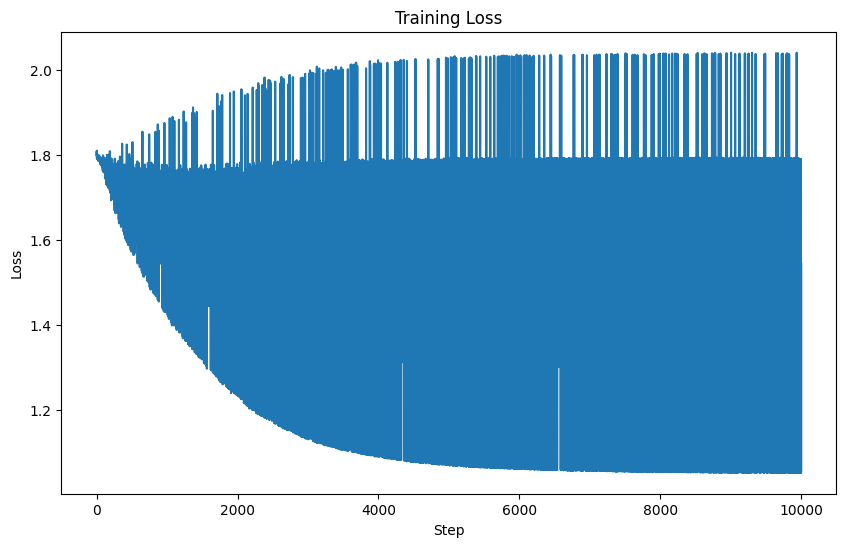

In [63]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


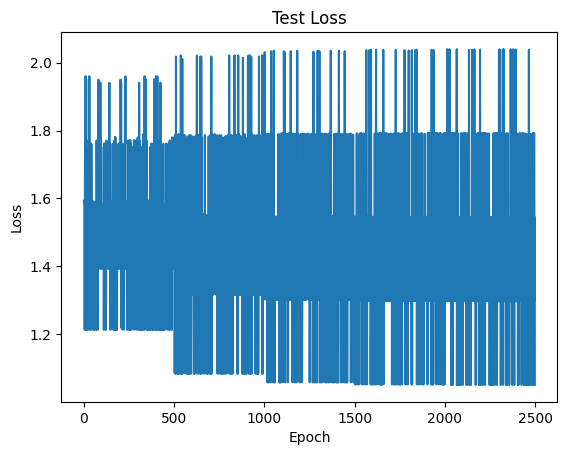

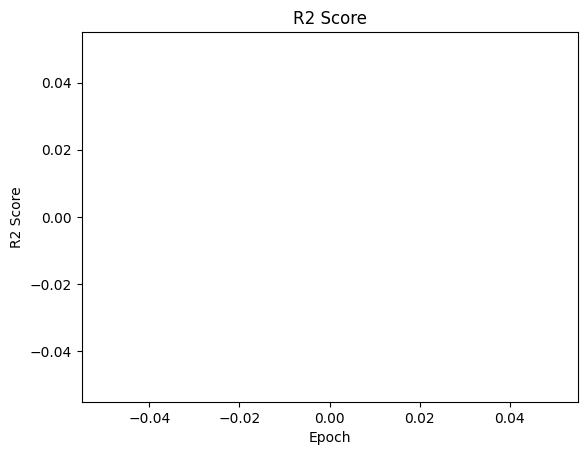

In [64]:
import matplotlib.pyplot as plt

# Plot the test loss
plt.plot(test_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.show()

# Plot the R2 scores
plt.plot(test_r2)
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.title('R2 Score')
plt.show()


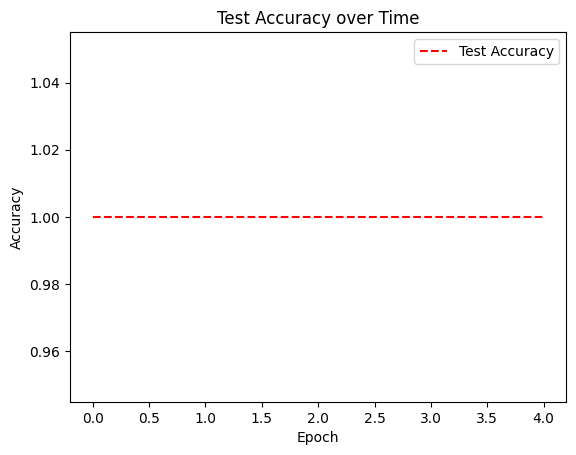

In [65]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate the test accuracy
test_accuracy = accuracy_score(actual_labels, predicted_labels)

# Plot the test accuracy
plt.plot([0, epoch], [test_accuracy, test_accuracy], 'r--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Time')
plt.legend()
plt.show()
